In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [7]:
df_fake = pd.read_csv(r"/kaggle/input/fake-news-detection/Fake.csv")
df_true = pd.read_csv(r"/kaggle/input/fake-news-detection/True.csv")

In [8]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
df_fake["class"] = 0
df_true["class"] = 1

In [11]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [12]:
df_fake.columns, df_true.columns

(Index(['title', 'text', 'subject', 'date', 'class'], dtype='object'),
 Index(['title', 'text', 'subject', 'date', 'class'], dtype='object'))

In [13]:
df_fake.dtypes, df_true.dtypes

(title      object
 text       object
 subject    object
 date       object
 class       int64
 dtype: object,
 title      object
 text       object
 subject    object
 date       object
 class       int64
 dtype: object)

In [14]:
missing_values = df_fake.isnull().sum()
print("Missing Values:")
print(missing_values)

missing_values = df_true.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
title      0
text       0
subject    0
date       0
class      0
dtype: int64
Missing Values:
title      0
text       0
subject    0
date       0
class      0
dtype: int64


In [15]:
categorical_cols = df_fake.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df_fake[col].value_counts())
    print()

Unique values in title:
title
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead                  6
FORMER FBI ASST DIRECTOR: “Jim Comey ‘Danced With The Devil’…I’m Glad He’s Gone” [VIDEO]                               4
ELEMENTARY SCHOOL PLANS ‘BLACKS ONLY’ FIELD TRIP TO COLLEGE FOR THIRD GRADERS                                          4
ANOTHER CLINTON CASUALTY? Activist MURDERED After Openly Blaming HILLARY For Meddling Role In Honduran Coup [VIDEO]    3
OBAMA’S ORGANIZED RACE WAR EXPOSED AS PROTESTORS REVEAL PROOF OF PAYMENT                                               3
                                                                                                                      ..
 AP Reports Hillary Clinton Has Reached The Delegate Threshold, Making Her The Democratic Nominee                      1
 Thanks To Republicans, Obama Nominee Dies Waiting For Confirmation                                                    1
 W

In [16]:
categorical_cols = df_true.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df_true[col].value_counts())
    print()

Unique values in title:
title
Factbox: Trump fills top jobs for his administration                                14
Factbox: Contenders for senior jobs in Trump's administration                        8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday     8
Factbox: International reaction to arrest of Reuters reporters in Myanmar            6
Highlights: The Trump presidency on April 21 at 6:12 p.m. EDT/2212 GMT               5
                                                                                    ..
Trump team weighs 'infrastructure bank' to fund projects: Trump adviser              1
Trump denies trying to get security clearance for his children                       1
Janus' Gross says Trump will be one-termer, in failure for populism                  1
After Trump victory, Obama and Merkel stress benefits of EU-U.S. trade deal          1
Trump shuffles transition team, eyes loyalists for Cabinet                           1
Name: count, 

In [17]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [18]:
df_true.shape, df_fake.shape

((21407, 5), (23471, 5))

In [19]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

/tmp/ipykernel_36/860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
/tmp/ipykernel_36/860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [20]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [21]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [22]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [23]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [24]:
numerical_cols = df_merge.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['class'], dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


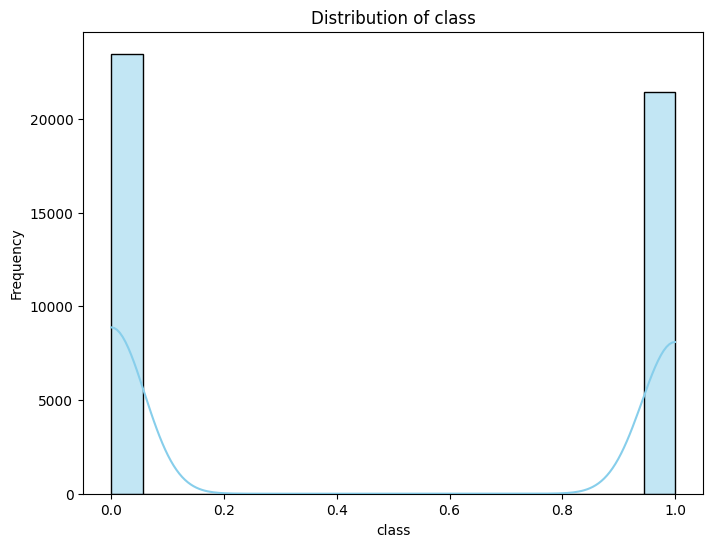

In [25]:
numerical_cols = df_merge.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_merge[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [26]:
df = df_merge.drop(["title", "subject","date"], axis = 1)
df.isnull().sum()

text     0
class    0
dtype: int64

In [27]:
df = df.sample(frac = 1)
df.head()

,text,class
12303,And the guy who s behind all of this hate is d...,0
20165,Did anyone else think it was the ultimate iron...,0
2814,WASHINGTON (Reuters) - U.S. Senate Republicans...,1
18233,(Reuters) - A Spanish Constitutional Court rul...,1
11432,,0


In [28]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [29]:
df.columns

Index(['text', 'class'], dtype='object')

In [30]:
df.head()

,text,class
0,And the guy who s behind all of this hate is d...,0
1,Did anyone else think it was the ultimate iron...,0
2,WASHINGTON (Reuters) - U.S. Senate Republicans...,1
3,(Reuters) - A Spanish Constitutional Court rul...,1
4,,0


In [31]:
df.skew(numeric_only=True)

class    0.092083
dtype: float64

In [32]:
df.describe()

,class
count,44878.000000
mean,0.477004
std,0.499476
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [33]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [34]:
df["text"] = df["text"].apply(wordopt)

In [35]:
x = df["text"]
y = df["class"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [38]:
#Logistic Regression -- Model 1
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [39]:
pred_lr=LR.predict(xv_test)

In [40]:
LR.score(xv_test, y_test)

0.9857397504456328

In [41]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5771
           1       0.98      0.99      0.99      5449

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [42]:
#Linear Regression --Model 2
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(xv_train, y_train)

LinearRegression()

In [43]:
lin_reg_pred = lin_reg.predict(xv_test)

In [44]:
lin_reg.score(xv_test, y_test)

0.7416780318078446

In [45]:
#Decision Tree Classification --Model 3
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [46]:
pred_dt = DT.predict(xv_test)

In [47]:
DT.score(xv_test, y_test)

0.9961675579322639

In [48]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5771
           1       1.00      1.00      1.00      5449

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [49]:
#Random Forest Classifier --Model 4
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
pred_rfc = RFC.predict(xv_test)

In [51]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5771
           1       0.99      0.99      0.99      5449

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [52]:
# Label output function
def output_label(n):
    return "Fake News" if n == 0 else "Not A Fake News"

# Manual testing function for a single news article
def manual_testing(news):
    # Prepare the test data
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)

    # Model predictions
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    # Print results
    print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {}".format(
        output_label(pred_LR[0]),
        output_label(pred_DT[0]),
        output_label(pred_RFC[0])
    ))


In [53]:
news = str(input())
manual_testing(news)

 Federal health officials told the AP they have not received any reports of Ebola cases at the Nevada event. A screenshot of a supposed post from the Centers for Disease Control and Prevention confirming such cases was fabricated. And there is no record of a national emergency being declared. The claims emerged after summer storm left muddy roads flooded, stranding tens of thousands of partygoers; event organizers let traffic flow out of the main road Monday afternoon. “So it was announced earlier that Burning Man was declared a national emergency because it was flooded, and so they sent in FEMA,” a woman claims in a TikTok video shared on Instagram, suggesting the development was suspicious. The AP found no record, including on federal websites and in White House announcements, of a national emergency declaration and FEMA confirmed that it was not involved in the situation. “No FEMA personnel or assets have been deployed to the Burning Man festival and there are no requests from local



LR Prediction: Fake News 
DT Prediction: Fake News 
RFC Prediction: Fake News


In [54]:
news = str(input())
manual_testing(news)

  NASA’s Perseverance rover touched down safely on the surface of Mars on February 18, 2021, after a seven-month journey through space. The rover will search for signs of ancient life and collect samples for future return to Earth. Scientists around the world celebrated the successful landing, which marks a significant milestone in Mars exploration.




LR Prediction: Fake News 
DT Prediction: Fake News 
RFC Prediction: Not A Fake News


In [57]:
news = str(input())
manual_testing(news)

 MOSCOW (Reuters) - Russiaâ€™s former ambassador to Washington, Sergei Kislyak, said on Saturday his conversations with former White House national security adviser Michael Flynn had been transparent and focused on matters of U.S.-Russia cooperation. Kislyak ended his tenure in Washington in July but remains a key figure in ongoing U.S. investigations into Moscowâ€™s alleged meddling in the 2016 presidential election. Flynn was forced to resign in February after it became known that he had failed to disclose the content of conversations he had with Kislyak and misled U.S. Vice-President Mike Pence about their meetings. â€œWe only spoke about the most simple things ... but the communication was completely correct, calm, absolutely transparent. In any case, there were no secrets on our side,â€ Kislyak said during a panel discussion on Russian television. â€œThere are a number of issues which are important for cooperation between Russia and the United States - most of all, terrorism. And



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
RFC Prediction: Not A Fake News


In [58]:
news = str(input())
manual_testing(news)

 The World Health Organization (WHO) announced in May 2023 that global efforts to eradicate polio have achieved significant progress, with only a handful of wild poliovirus cases reported worldwide during the year. According to the WHO, mass immunization campaigns and improved surveillance have played a crucial role in reducing transmission, particularly in countries that were previously considered polio-endemic. Health officials highlighted the collaboration between governments, international agencies, and local communities as a key factor in reaching vulnerable populations and ensuring that children receive the necessary vaccinations. The organization also reported that, thanks to these initiatives, millions of children in Africa and South Asia are now protected against the disease, and several regions have maintained their polio-free status for over five years. Despite these successes, experts caution that continued vigilance is necessary to prevent outbreaks, especially in areas af



LR Prediction: Fake News 
DT Prediction: Fake News 
RFC Prediction: Not A Fake News
